## Multi–path Convolution Neural Network  for lung cancer detection
### using Convolusional layers in three path in mp-CNN Networks for Kaggle Data Science Bowl
### (KDSB) 2017 challenge (KDSB 2017). 

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#import os
#import cv2
from tqdm import tqdm
#import pickle
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D,Conv3D , MaxPooling2D

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#from tqdm import tqdm
#from PIL import ImageEnhance
#from PIL import Image as pil_image
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import random
from keras.regularizers import l1 , l2
from tensorflow.keras import datasets, layers, models
#reg = l1(0.001)
#from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [3]:
#Loading Data file names and lables
#train=pd.read_csv('cov19')
train=pd.read_csv('cov_csv_2309.csv')

In [5]:
#image names and lables
print(" image names:    " ,# train['image_name'].unique(),
      "\n","lable of images:" ,train['lable'].unique())

 image names:     
 lable of images: [1 0]


In [4]:
# the number of data in each class
train["lable"].value_counts()

1    1160
0    1149
Name: lable, dtype: int64

In [5]:
# list of lables " start from 0 not from 1 "
unique_lable = train['lable'].unique()
print(unique_lable)

[1 0]


In [13]:
import cv2 
# path 
path = r'C:\Users\Sahhay\Desktop\covid dataset new\data-cov2309\cov (3).png'
# Using cv2.imread() method 
img = cv2.imread(path) 
# Displaying the image 
#cv2.imshow('image', img) 
print( 'Original Dimensions : ', img.shape)

Original Dimensions :  (254, 342, 3)


## Load Data

In [6]:
# read all the training images, store them in a list, and convert that list into a numpy array
train_image =[]
for i in  tqdm(range(train.shape[0])):
        img = image.load_img('data-cov2309\\'+'cov ('+str(i)+')'+'.png', target_size=(64,64,1),color_mode = "grayscale")# grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
       # img = image.load_img('10/'+train['Image_Name'][i]+'.jpg' ,

100%|██████████████████████████████████████████████████████████████████████████████| 2309/2309 [01:33<00:00, 24.79it/s]


In [7]:
# append images to 'X' and Lables to 'y'
X = np.array(train_image)
y=train['lable'].values


In [8]:
#Creating a validation set from the training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [21]:
# the shapes
print("X shape is:          " , X.shape , "\n",
      'X_train shape is:   ' , X_train.shape,"\n",
      'X test shape is    ' , X_test.shape,"\n" ,
      'y_train shape is:   ' ,y_train.shape )

X shape is:           (2309, 64, 64, 1) 
 X_train shape is:    (1847, 64, 64, 1) 
 X test shape is     (462, 64, 64, 1) 
 y_train shape is:    (1847,)


In [22]:
class_names=['NonCovid','Covid']

In [23]:
# count of each class 
train["lable"].value_counts()

1    1160
0    1149
Name: lable, dtype: int64

In [192]:
(class_names)[y[1161]]


'NonCovid19'

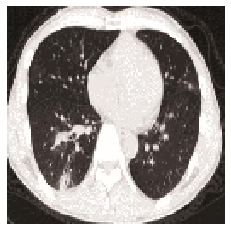

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[30]
#some_digit_image = some_digit.reshape(120,120)
plt.imshow(some_digit, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

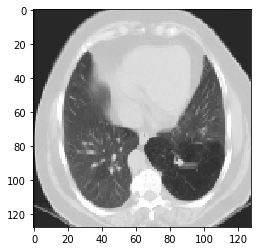

In [21]:
from matplotlib import pyplot as plt
plt.imshow(X_train[11])
#path

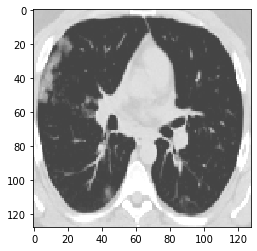

In [16]:
plt.imshow(X[20])#, cmap="binary")
#plt.axis('off')
plt.show()

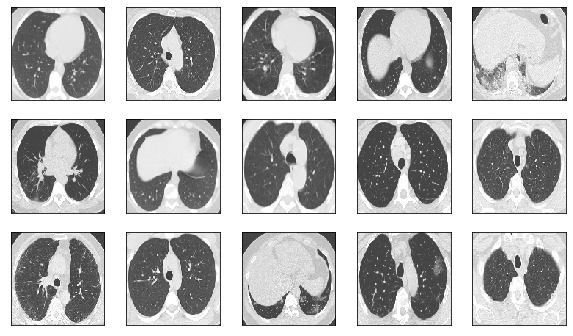

In [17]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [75]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu' , input_shape=(64, 64,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(10, (3, 3), activation='relu'))
#model.add(Dense(10, activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

### Define sequential model to train data

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(Dense(10, activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(60,  kernel_initializer='glorot_normal', activation='relu')) #,activity_regularizer=l2(0.001)))
keras.layers.BatchNormalization()
#model.add(BatchNormalization())
model.add(layers.Dense(40, kernel_initializer="glorot_normal" , activation='relu')) #,activity_regularizer=l2(0.001)))
keras.layers.BatchNormalization()
model.add(layers.Dense(40, activation='relu'))
keras.layers.BatchNormalization()
#model.add(layers.Dropout(0.50))
model.add(layers.Dense(20,kernel_initializer="glorot_normal" , activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [26]:
#compile with loss func 'sparse_categorical_crossentropy' 'adam' is the beter result than 'sgd'
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Set callback functions to early stop training and save the best model 
# keras.callbacks.callbacks.ModelCheckpoint(filepath='best.h5', monitor='val_loss', verbose=0,
                                          # save_best_only=True, mode='auto', period=1)
callback = [EarlyStopping(monitor='val_loss', patience=3 ), 
            ModelCheckpoint(filepath='model_cov-save.h5', monitor='val_loss' , save_best_only=True)]

In [30]:
#train the model on the training set images and validate it
#checkpoint = keras.callbacks.ModelCheckpoint( filepath='model_6disease.h5', save_best_only=True)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4)]
model.fit(X_train, y_train, 
          epochs=5,                   
          validation_data=(X_test, y_test),  
          batch_size=32 , callbacks=my_callbacks)
          #callbacks=[checkpoint],         # Early Stopping & checkpoint
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

Train on 1847 samples, validate on 462 samples
Epoch 1/5
1847/1847 [==============================] - 32s 17ms/sample - loss: 0.2800 - accuracy: 0.8960 - val_loss: 0.2328 - val_accuracy: 0.9091
Epoch 2/5
1847/1847 [==============================] - 33s 18ms/sample - loss: 0.2506 - accuracy: 0.9063 - val_loss: 0.2410 - val_accuracy: 0.9026
Epoch 3/5
1847/1847 [==============================] - 33s 18ms/sample - loss: 0.2140 - accuracy: 0.9231 - val_loss: 0.2145 - val_accuracy: 0.9091
Epoch 4/5
1847/1847 [==============================] - 34s 18ms/sample - loss: 0.2677 - accuracy: 0.8917 - val_loss: 0.3438 - val_accuracy: 0.8571
Epoch 5/5
1847/1847 [==============================] - 33s 18ms/sample - loss: 0.2022 - accuracy: 0.9274 - val_loss: 0.1886 - val_accuracy: 0.9307


In [32]:
#train the model on the training set images and validate it
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')
#checkpoint = keras.callbacks.ModelCheckpoint( filepath='model_6disease.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
modelcov_save = ModelCheckpoint('.modelcov_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model.fit(X_train, y_train, 
          epochs=3,                   
          validation_data=(X_test, y_test),  
          batch_size=32 ,callbacks=[early_stopping,modelcov_save ])


Train on 1847 samples, validate on 462 samples
Epoch 1/3
1847/1847 [==============================] - 34s 19ms/sample - loss: 0.0717 - accuracy: 0.9675 - val_loss: 0.1849 - val_accuracy: 0.9459
Epoch 2/3
1847/1847 [==============================] - 35s 19ms/sample - loss: 0.0304 - accuracy: 0.9897 - val_loss: 0.2435 - val_accuracy: 0.9307
Epoch 3/3
1847/1847 [==============================] - 37s 20ms/sample - loss: 0.0214 - accuracy: 0.9919 - val_loss: 0.2067 - val_accuracy: 0.9372


In [37]:
#model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
from keras.callbacks import ReduceLROnPlateau
early_stopping = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
modelcov_save = ModelCheckpoint('.modelcov_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping,modelcov_save,reduce_lr ])

Train on 1847 samples, validate on 462 samples
Epoch 1/3
1847/1847 [==============================] - 34s 19ms/sample - loss: 0.0364 - accuracy: 0.9875 - val_loss: 0.2967 - val_accuracy: 0.9307
Epoch 2/3
1847/1847 [==============================] - 34s 18ms/sample - loss: 0.1094 - accuracy: 0.9632 - val_loss: 0.2209 - val_accuracy: 0.9264
Epoch 3/3
1847/1847 [==============================] - 33s 18ms/sample - loss: 0.0106 - accuracy: 0.9978 - val_loss: 0.2264 - val_accuracy: 0.9437


In [38]:
#Evaluate with early stopping best patience 5
model.evaluate(X_test, y_test , verbose=0)

[0.22637573538198905, 0.94372296]

In [39]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score1[0])
print('Test accuracy:', score1[1])

Test score: 0.22637573538198905
Test accuracy: 0.94372296


In [70]:
score2 = model.evaluate(x_test173, y_test173, verbose=0)
print('Test score:', score2[0])
print('Test accuracy:', score2[1])

Test score: 1.4688138036146137
Test accuracy: 0.7456647


462/1 - 2s - loss: 0.1147 - accuracy: 0.9437
test accuracy: 0.94372296


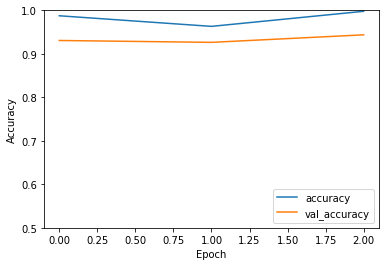

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print("test accuracy:" ,test_acc)

In [41]:
print(test_acc)

0.94372296


In [42]:
# 
X_new = X_test[:10]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.89, 0.11],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.07, 0.93],
       [1.  , 0.  ]], dtype=float32)

In [43]:
y_predict = model.predict_classes(X_new)
y_predict

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [51]:
X_new1 = X[:10]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.89, 0.11],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.07, 0.93],
       [1.  , 0.  ]], dtype=float32)

In [52]:

y_predict = model.predict_classes(X_new1)
y_predict1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

# Load test data

In [53]:
# load the test set images
test = pd.read_csv('cov_csv-test173.csv')

In [54]:
print(test.iloc[1] , "\n" ,"test shape = ",test.shape[0])

image_name    cov-test (2)
lable                    1
Name: 1, dtype: object 
 test shape =  173


In [66]:
test.shape[0]

173

In [55]:
test_image =[]
for i in  tqdm(range(test.shape[0])):
        img = image.load_img('data-test-173\\'+'cov-test ('+str(i)+')'+'.png', target_size=(64,64,1),grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        test_image.append(img)


  0%|                                                                                          | 0/173 [00:00<?, ?it/s]c:\users\sahhay\appdata\local\programs\python\python37\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|████████████████████████████████████████████████████████████████████████████████| 173/173 [00:02<00:00, 64.25it/s]


test_image =[]
for i in  tqdm(range(test.shape[0])):
        img = image.load_img('data-test-173\\'+'Nocov ('+str(i)+')'+'.jpg', target_size=(64,64,1),grayscale=True)
        img = image.img_to_array(img)
        img = img/255
        test_image.append(img)


In [56]:
# append images to x_test911 and lables to y_test911
x_test173= np.array(test_image)
y_test173=test['lable'].values

In [57]:
x_test173.shape

(173, 64, 64, 1)

In [61]:
#number of difrent classesin test set
test["lable"].value_counts()

0    92
1    81
Name: lable, dtype: int64

In [58]:
X_new = x_test173[1:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]], dtype=float32)

In [59]:
#  2 errore in 11 data 
y_predict = model.predict(X_new)
y_predict

array([[9.8019421e-01, 1.9805729e-02],
       [9.9058437e-01, 9.4156358e-03],
       [9.7583425e-01, 2.4165705e-02],
       [5.2130539e-03, 9.9478698e-01],
       [2.2661632e-05, 9.9997735e-01],
       [8.0909362e-05, 9.9991906e-01],
       [4.9123931e-04, 9.9950874e-01],
       [3.0590345e-05, 9.9996936e-01],
       [2.2769793e-05, 9.9997723e-01]], dtype=float32)

In [60]:
y_predict = model.predict_classes(X_new)
y_predict

array([0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [62]:
x_new1 = x_test173[1:92]
x_new2 = x_test173[93:173]



In [63]:
y_prob1 = model.predict(x_new1)
y_prob2 = model.predict(x_new2)


In [64]:
y_pred1 = model.predict_classes(x_new1)
y_pred2 = model.predict_classes(x_new2)

print((class_names)[y_test173[1]],'  ',y_pred1 ,"\n","\n",
      (class_names)[y_test173[170]],'  ', y_pred2)


Covid    [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0] 
 
 NonCovid    [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [66]:
# making predictions
prediction = model.predict(x_test173,batch_size=2)

In [67]:
y_predict = model.predict_classes(X_new)
y_predict

array([0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [69]:
score = model.evaluate(x_test173, y_test173, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.4688138036146137
Test accuracy: 0.7456647


In [27]:
#print(prediction)

In [ ]:
input1 = keras.layers.Input(shape=(128,128,3))
#model.add(Flatten(input_shape=(28,28,1)))
#input1 = keras.layers.Input(shape=X_train.shape[1:])
h1 = keras.layers.Flatten()(input1)
#h2 = Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3))(h1)
h2 = keras.layers.Dense(60, activation="relu")(h1)
keras.layers.BatchNormalization()
h3 = keras.layers.Dense(30, activation="relu")(h2)
keras.layers.BatchNormalization()
#h4 = keras.layers.Dense(20, activation="relu")(h3)
keras.layers.BatchNormalization()
#h5 = keras.layers.Dense(30, activation="relu")(h4)
concat1 = keras.layers.concatenate([h2, h3])
#concat2 = keras.layers.concatenate([h3, h4])
#concat3 = keras.layers.concatenate([concat1, concat2])
output = keras.layers.Dense(1)(concat1)
model = keras.models.Model(inputs=[input1], outputs=[output])

In [ ]:
#from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
visible = Input(shape=(128,128,3))
conv1 = Conv2D(64, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
 summarize layers
print(model.summary())
 plot graph
plot_model(model, to_file='convolutional_neural_network.png')

## Define 3 different Path on CNN Functional Model
### for mp-CNN network using convolution and maxpolling layers
### finaly concatenate output of each path togather

In [30]:
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
# define a graph with 3 different path for our model structure
# first path
visible1 = Input(shape=(64,64,1))
conv1 = Conv2D(64, kernel_size=3, activation='relu')(visible1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64, kernel_size=3, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(64, kernel_size=3, activation='relu')(pool3)
pool4 = MaxPooling2D(pool_size=(4, 4))(conv4)
#x1   = Dropout(0.5)(pool3)
flat1 = Flatten()(pool4)
hidden1 = Dense(2, activation='relu')(flat1)

#second path
#visible1 = Input(shape=(128,128,3))
conv11 = Conv2D(64, kernel_size=5, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv22 = Conv2D(64, kernel_size=5, activation='relu')(pool11)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
conv33 = Conv2D(64, kernel_size=5, activation='relu')(pool22)
pool33 = MaxPooling2D(pool_size=(2, 2))(conv33)
#x2     = Dropout(0.5)(pool22)
flat11 = Flatten()(pool33)
hidden11 = Dense(2, activation='relu')(flat11)

#third path
conv111 = Conv2D(64, kernel_size=7, activation='relu')(visible1)
pool111 = MaxPooling2D(pool_size=(2, 2))(conv111)
conv222 = Conv2D(64, kernel_size=7, activation='relu')(pool111)
pool222 = MaxPooling2D(pool_size=(2, 2))(conv222)
#x3      = Dropout(0.5)(pool222)
flat111 = Flatten()(pool222)
hidden111 = Dense(2, activation='relu')(flat111)

# concatenation three path
concat1 = concatenate([hidden1, hidden11,hidden111])

#output = Dense(1, activation='sigmoid')(concat1)
output = Dense(1, activation='softmax')(concat1)
model = Model(inputs=visible1, outputs = output )


# summarize layers
print(model.summary())
# plot graph
#plot_model(model, to_file='convolutional_neural_network.png')

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 62, 62, 64)   640         input_5[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_36 (MaxPooling2D) (None, 31, 31, 64)   0           conv2d_36[0][0]                  
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 29, 29, 64)   36928       max_pooling2d_36[0][0]           
____________________________________________________________________________________________

In [78]:
print(tf.__version__)

2.0.0


In [82]:
print(tf.keras.__version__)

2.2.4-tf


In [102]:
from keras.models import Model
from keras.layers import Concatenate, Dense,  Input, concatenate
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
# define a graph with 3 different path for our model structure
# first path
visible1 = Input(shape=(64,64,1))
conv1 = Conv2D(64, kernel_size=3, activation='relu')(visible1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64, kernel_size=3, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat1 = Flatten()(pool3)
hidden1 = Dense(2, activation='relu')(flat1)

#second path
#visible1 = Input(shape=(128,128,3))
conv11 = Conv2D(64, kernel_size=5, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv22 = Conv2D(64, kernel_size=5, activation='relu')(pool11)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat11 = Flatten()(pool22)
hidden11 = Dense(2, activation='relu')(flat11)

#third path
conv111 = Conv2D(64, kernel_size=7, activation='relu')(visible1)
pool111 = MaxPooling2D(pool_size=(2, 2))(conv111)
conv222 = Conv2D(64, kernel_size=7, activation='relu')(pool111)
pool222 = MaxPooling2D(pool_size=(2, 2))(conv222)
flat111 = Flatten()(pool222)
hidden111 = Dense(2, activation='relu')(flat111)

# concatenation three path
concat1 = concatenate([hidden1, hidden11,hidden111])

#output = Dense(1, activation='sigmoid')(concat1)
output = Dense(1, activation='softmax')(concat1)
model = Model(inputs=visible1, outputs = output )


# summarize layers
print(model.summary())
# plot graph
#plot_model(model, to_file='convolutional_neural_network.png')

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 62, 62, 64)   640         input_23[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_101 (MaxPooling2D (None, 31, 31, 64)   0           conv2d_103[0][0]                 
__________________________________________________________________________________________________
conv2d_104 (Conv2D)             (None, 29, 29, 64)   36928       max_pooling2d_101[0][0]          
____________________________________________________________________________________________

keras.utils.plot_model(model, "my_first_model.png")

In [31]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics=["accuracy"])
#history = model.fit(X_train, y_train, epochs=5,
       #             validation_data=(X_test, y_test))
#mse_test = model.evaluate(X_test, y_test)
#y_pred = model.predict(X_new)

In [32]:
#early_stopping = keras.callbacks.EarlyStopping(patience=8,
                                                 # restore_best_weights=True)
#model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),batch_size=32)#,callbacks=[early_stopping])
checkpoint = keras.callbacks.ModelCheckpoint( filepath='model_cov19.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=4,
                                                  restore_best_weights=True)
model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_test, y_test),
                    callbacks=[ early_stopping, checkpoint ])

Train on 1847 samples, validate on 462 samples
Epoch 1/3
1847/1847 [==============================] - 165s 89ms/step - loss: 0.4932 - accuracy: 0.5068 - val_loss: 0.5152 - val_accuracy: 0.4848
Epoch 2/3
1847/1847 [==============================] - 153s 83ms/step - loss: 0.4932 - accuracy: 0.5068 - val_loss: 0.5152 - val_accuracy: 0.4848
Epoch 3/3
1847/1847 [==============================] - 161s 87ms/step - loss: 0.4932 - accuracy: 0.5068 - val_loss: 0.5152 - val_accuracy: 0.4848


import pydot
import graphviz
from keras.utils import plot_model
plot_model(model, to_file='model.png')

### evaluate the model with test data

In [108]:
model.evaluate(X_test, y_test , verbose=0)


[0.5151515156675727, 0.4848484992980957]

In [31]:
! pip install graphviz
!brew install graphviz

'brew' is not recognized as an internal or external command,
operable program or batch file.


from sklearn.tree import export_graphviz
tree_file = export_graphviz(model, out_file=None)

In [109]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score1[0])
print('Test accuracy:', score1[1])

Test score: 0.5151515156675727
Test accuracy: 0.4848484992980957


In [110]:
score_test = model.evaluate(x_test173, y_test173, verbose=0)
print('Test score:', score_test[0])
print('Test accuracy:', score_test[1])

Test score: 0.5317919075144508
Test accuracy: 0.46820810437202454


In [111]:
X_new = x_test173[1:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [112]:
keras.utils.plot_model(model, "my_model.png", show_shapes=True)

InvocationException: GraphViz's executables not found

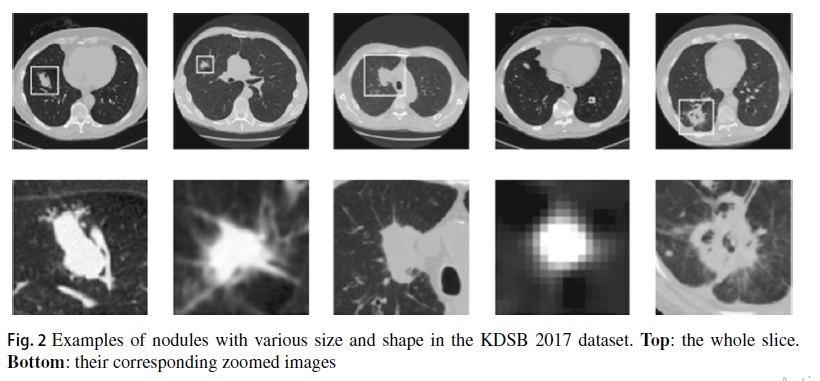

In [7]:
from IPython.display import display
from PIL import Image
path="C:/Users/Sahhay/Desktop/covid dataset new/fig/fig1.jpg"
display(Image.open(path))

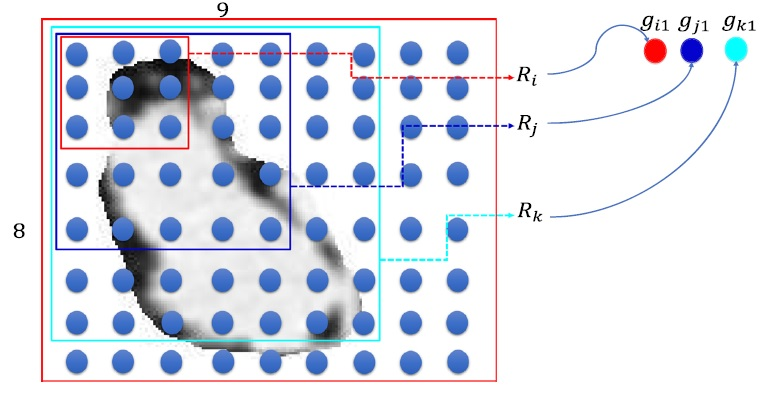

In [8]:
path="C:/Users/Sahhay/Desktop/covid dataset new/fig/fig2.jpg"
display(Image.open(path))

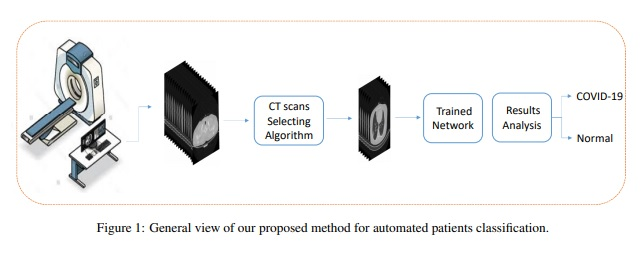

In [9]:
path="C:/Users/Sahhay/Desktop/covid dataset new/fig/fig3.jpg"
display(Image.open(path))

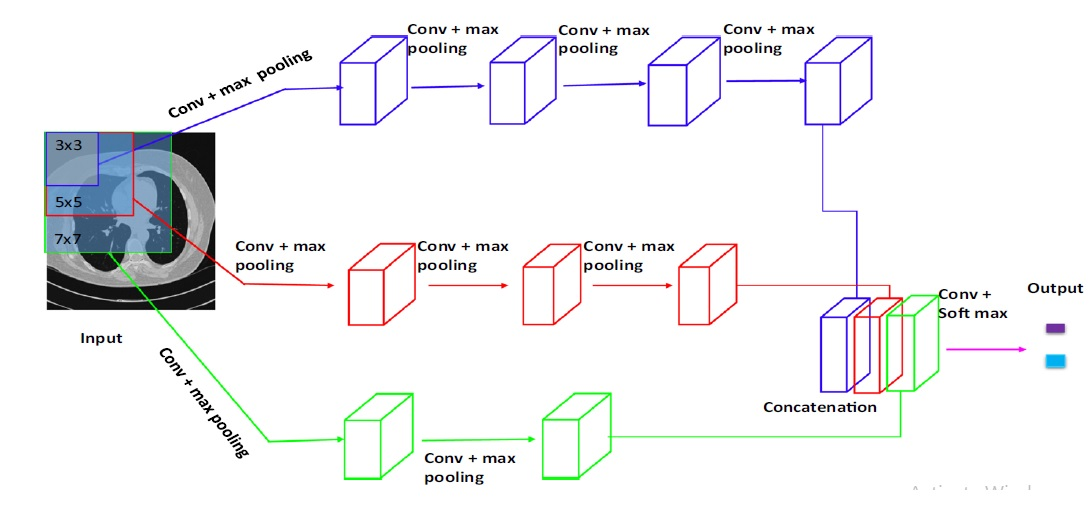

In [10]:
path="C:/Users/Sahhay/Desktop/covid dataset new/fig/fig4.jpg"
display(Image.open(path))

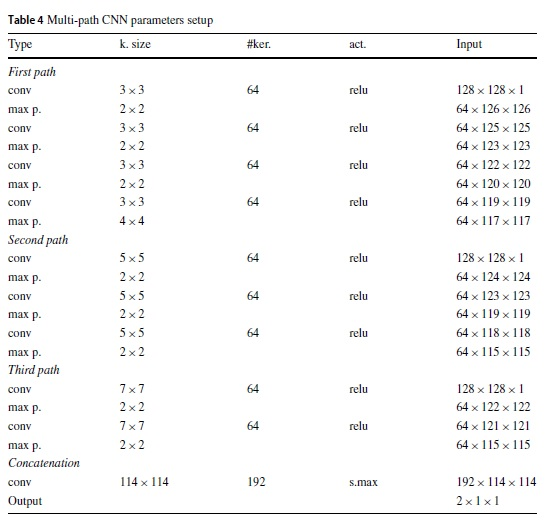

In [13]:
path="C:/Users/Sahhay/Desktop/covid dataset new/fig/fig6.jpg"
display(Image.open(path))

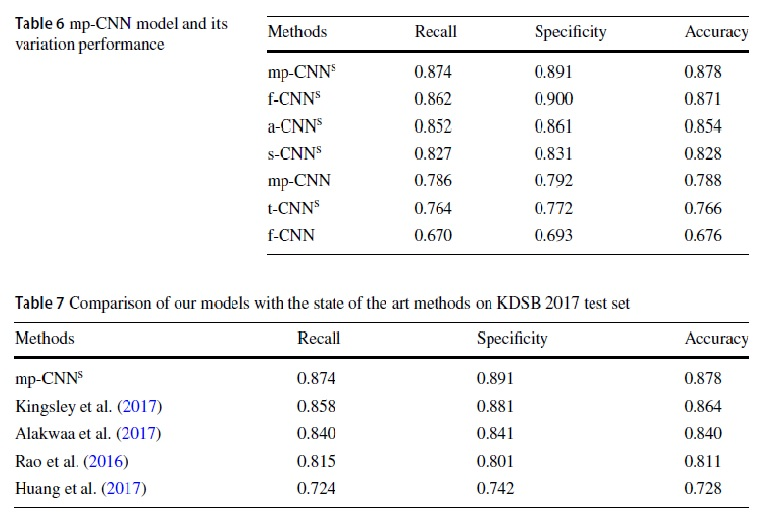

In [12]:
path="C:/Users/Sahhay/Desktop/covid dataset new/fig/fig7.jpg"
display(Image.open(path))